In [25]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [6]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional.csv to bank-additional.csv


In [7]:
 import os
print(os.listdir())


['.config', 'bank-additional.csv', 'sample_data']


In [8]:
# Previewing the file (not required for loading, just for inspection)
with open("bank-additional.csv", 'r') as f:
    for i in range(6):
        print(f.readline().strip())



"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
30;"blue-collar";"married";"basic.9y";"no";"yes";"no";"cellular";"may";"fri";487;2;999;0;"nonexistent";-1.8;92.893;-46.2;1.313;5099.1;"no"
39;"services";"single";"high.school";"no";"no";"no";"telephone";"may";"fri";346;4;999;0;"nonexistent";1.1;93.994;-36.4;4.855;5191;"no"
25;"services";"married";"high.school";"no";"yes";"no";"telephone";"jun";"wed";227;1;999;0;"nonexistent";1.4;94.465;-41.8;4.962;5228.1;"no"
38;"services";"married";"basic.9y";"no";"unknown";"unknown";"telephone";"jun";"fri";17;3;999;0;"nonexistent";1.4;94.465;-41.8;4.959;5228.1;"no"
47;"admin.";"married";"university.degree";"no";"yes";"no";"cellular";"nov";"mon";58;1;999;0;"nonexistent";-0.1;93.2;-42;4.191;5195.8;"no"


In [9]:
# Load with correct delimiter and quote character
df = pd.read_csv("bank-additional.csv", sep=';', quotechar='"')

# Now display the first 6 rows
df.head(6)


age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   
5   32     services   single  university.degree      no       no       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   
5   cellular   sep         thu  ...         3    999         2      failure   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  
5         -1.1          94.199          -37.5      0.884       4963.6  no  

[6 rows x 21 columns]

In [10]:
df.tail()

age         job  marital    education default housing loan    contact  \
4114   30      admin.  married     basic.6y      no     yes  yes   cellular   
4115   39      admin.  married  high.school      no     yes   no  telephone   
4116   27     student   single  high.school      no      no   no   cellular   
4117   58      admin.  married  high.school      no      no   no   cellular   
4118   34  management   single  high.school      no     yes   no   cellular   

     month day_of_week  ...  campaign  pdays  previous     poutcome  \
4114   jul         thu  ...         1    999         0  nonexistent   
4115   jul         fri  ...         1    999         0  nonexistent   
4116   may         mon  ...         2    999         1      failure   
4117   aug         fri  ...         1    999         0  nonexistent   
4118   nov         wed  ...         1    999         0  nonexistent   

     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
4114          1.4          93.918          -42.7      4.958       5228.1  no  
4115          1.4          93.918          -42.7      4.959       5228.1  no  
4116         -1.8          92.893          -46.2      1.354       5099.1  no  
4117          1.4          93.444          -36.1      4.966       5228.1  no  
4118         -0.1          93.200          -42.0      4.120       5195.8  no  

[5 rows x 21 columns]

In [11]:
df.shape

(4119, 21)

In [12]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [18]:
df.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.400000       92.201000     -50.800000     0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000     1.334000  5099.100000  
50%        1.100000       93.749000     -41.800000     4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.961000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

In [19]:
df.describe(include= 'object')

job  marital          education default housing  loan   contact  \
count     4119     4119               4119    4119    4119  4119      4119   
unique      12        4                  8       3       3     3         2   
top     admin.  married  university.degree      no     yes    no  cellular   
freq      1012     2509               1264    3315    2175  3349      2652   

       month day_of_week     poutcome     y  
count   4119        4119         4119  4119  
unique    10           5            3     2  
top      may         thu  nonexistent    no  
freq    1378         860         3523  3668

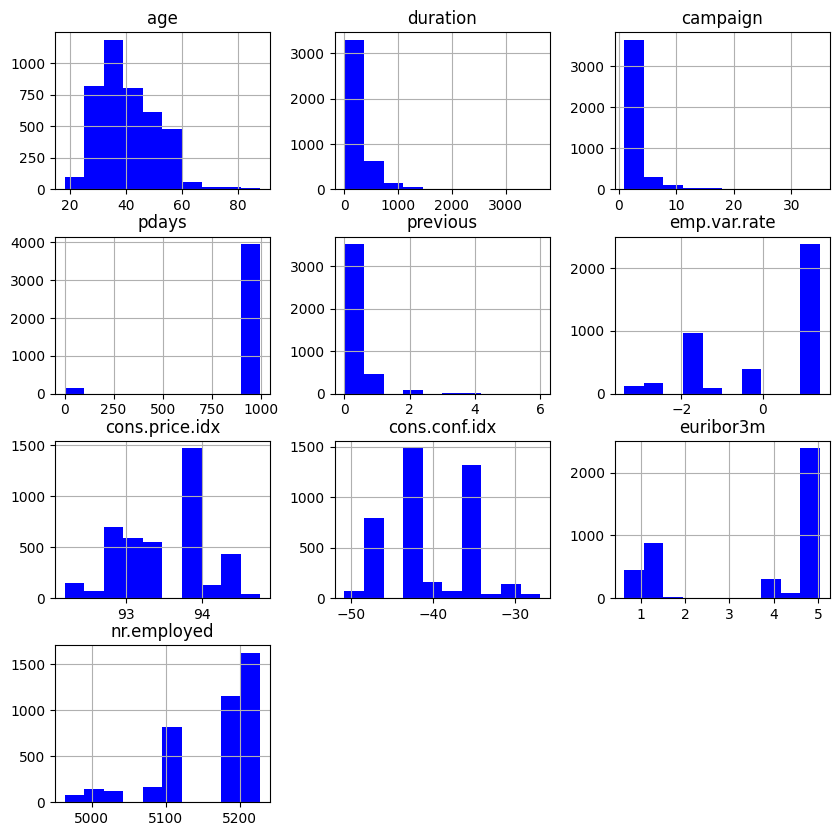

In [20]:
df.hist(figsize=(10,10),color='blue')
plt.show()

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


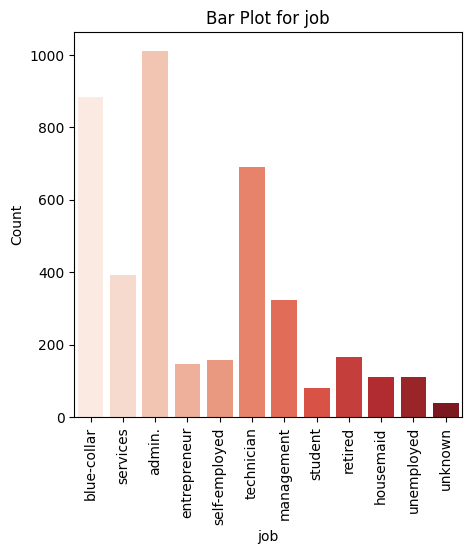

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


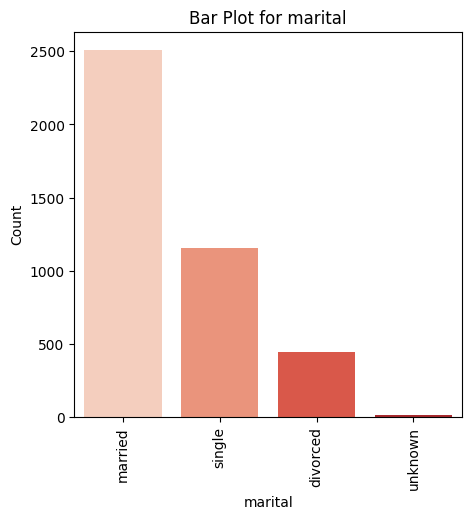

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


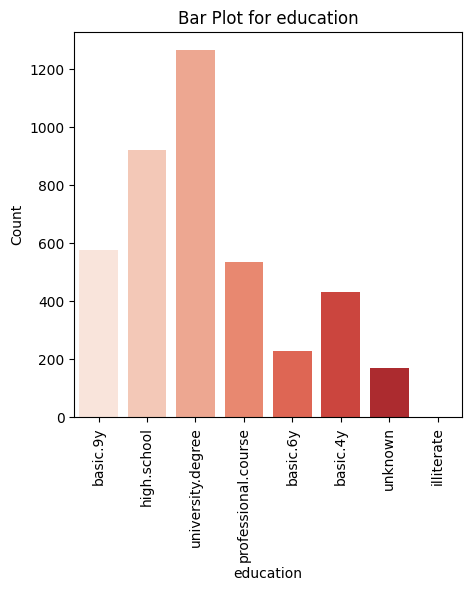

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


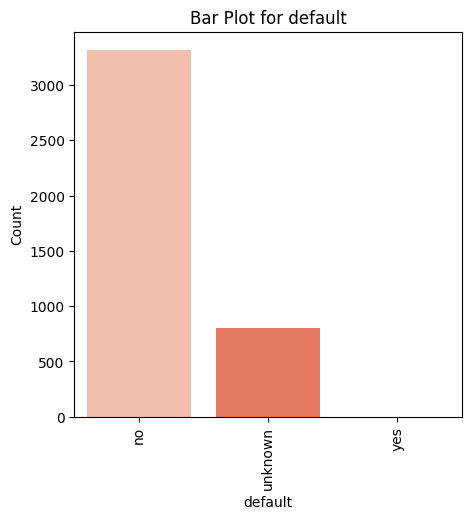

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


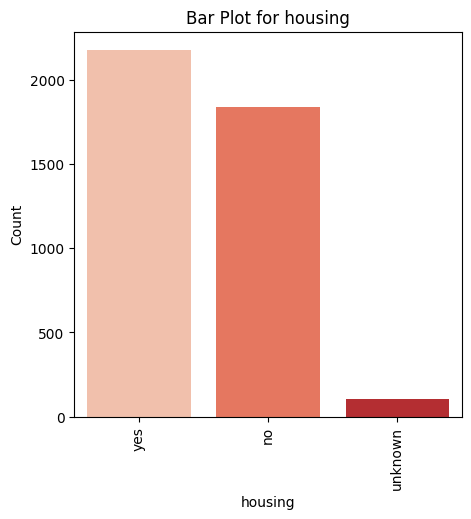

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


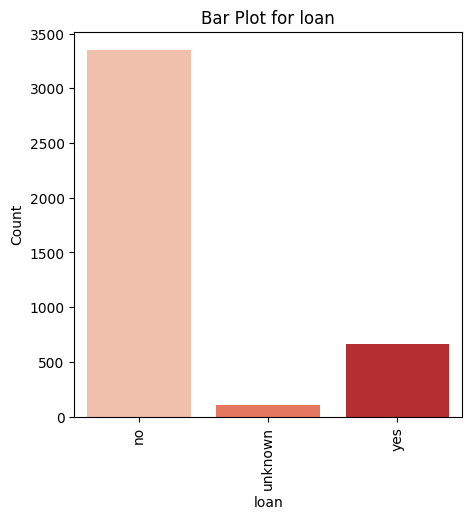

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


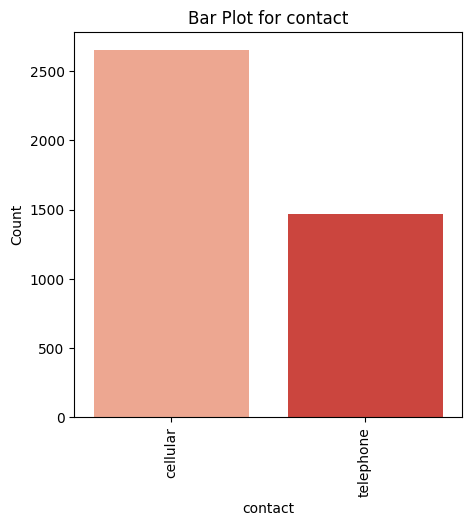

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


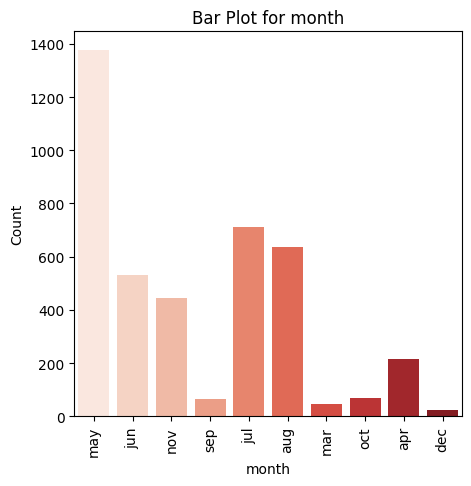

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


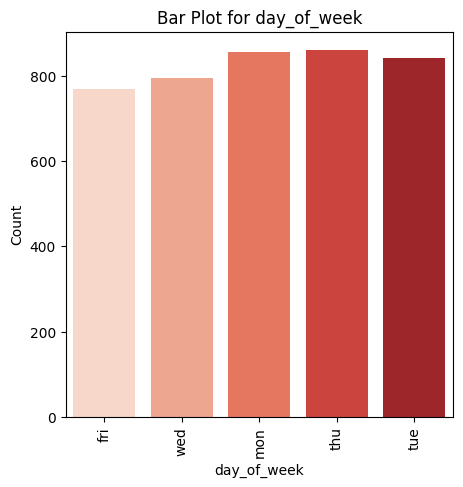

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


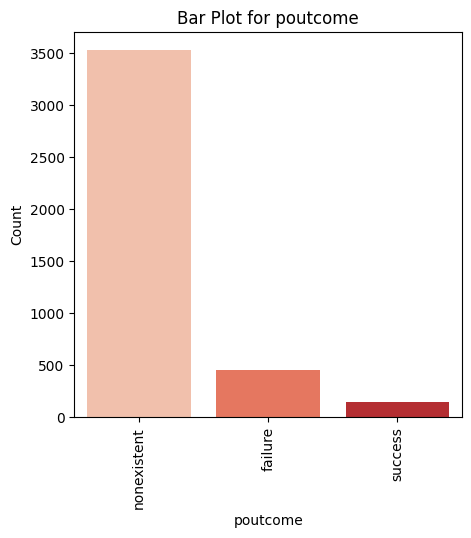

<ipython-input-21-6f8c324e5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='Reds')


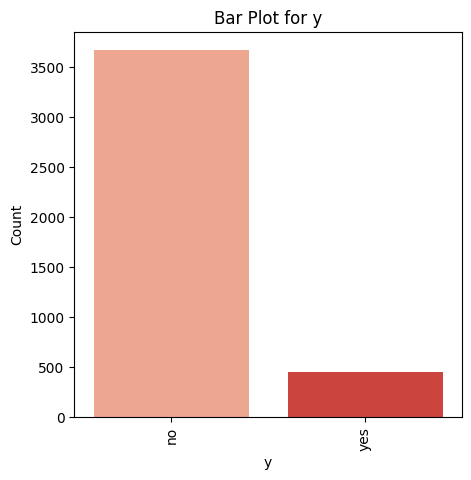

In [21]:
for feature in cat_cols:
  plt.figure(figsize=(5,5))
  sns.countplot(x=feature,data=df,palette='Reds')
  plt.title(f'Bar Plot for {feature}')
  plt.xlabel(f'{feature}')
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

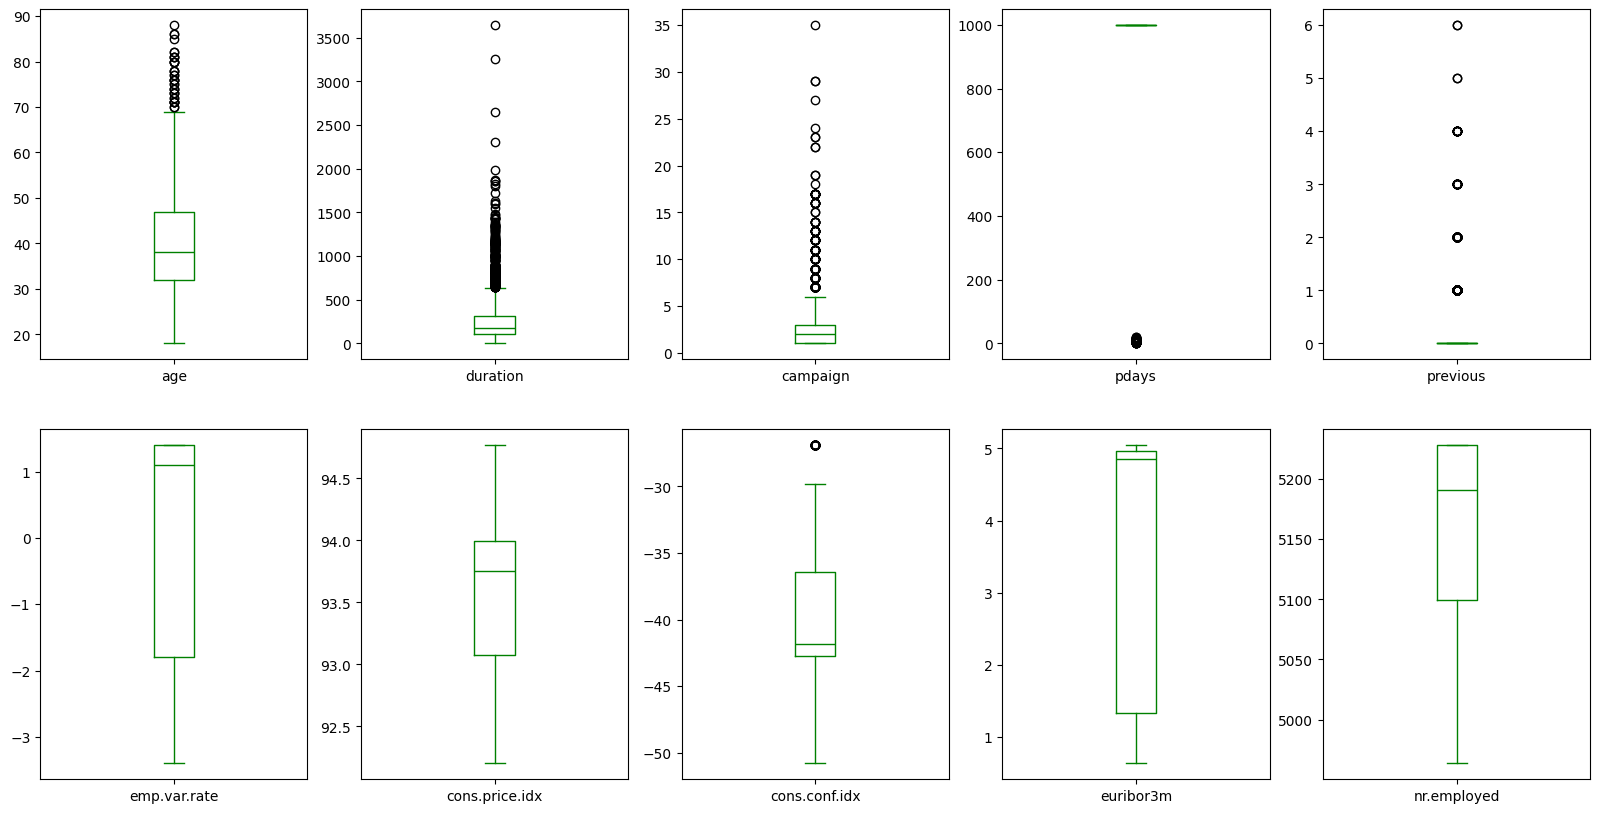

In [23]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='green')
plt.show()

In [29]:
lb = LabelEncoder()
de1 = df.copy()
df_encoded = df1.apply(lb.fit_transform)
print(df_encoded)

      age  job  marital  education  default  housing  loan  contact  month  \
0      12    1        1          2        0        2     0        0      6   
1      21    7        2          3        0        0     0        1      6   
2       7    7        1          3        0        2     0        1      4   
3      20    7        1          2        0        1     1        1      4   
4      29    0        1          6        0        2     0        0      7   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
4114   12    0        1          1        0        2     2        0      3   
4115   21    0        1          3        0        2     0        1      3   
4116    9    8        2          3        0        0     0        0      6   
4117   40    0        1          3        0        0     0        0      1   
4118   16    4        2          3        0        2     0        0      7   

      day_of_week  ...  campaign  pdays  previous  poutcome  em

In [34]:
df_encoded['y'].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [35]:
x=df_encoded.drop('y',axis=1)
y=df_encoded['y']
print(x.shape)
print(y.shape)

(4119, 20)
(4119,)


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
print(4119*0.25)

1029.75


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 20)
(1030, 20)
(3089,)
(1030,)


In [39]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['no', 'yes']
